In [1]:
import  pandas as pd 
import numpy as np
from sklearn.cluster  import KMeans
import matplotlib.pyplot  as plt
from sklearn.preprocessing import scale
from sklearn import cluster
pd.set_option('display.max_columns',None)

In [2]:
def improt_data(lujing,code):
    data = pd.read_csv(lujing,encoding =code)
    return data

In [6]:
lujing = r'C:\Users\Administrator\Datas\爱尚花语\艾尚月季度数据\7月份数据\Data/门店数据(M).csv'
code = 'gbk'
data = improt_data(lujing,code)

In [7]:
def ziduan(data,list_ziduan):
    data = data[list_ziduan]
    return data

In [8]:
list_ziduan = ['开始日期','结束日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','推单数','有效订单数','下单新客人数','入店转化率','下单转化率','原价交易额','实付交易额','商家补贴金额']

In [9]:
data = ziduan(data,list_ziduan)
data

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额
0,20200701,20200731,9024275,花韵花艺馆鲜花礼品鲜花店,鲜花组,河南省,郑州,否,20200508,在线,18.0,18.0,2536,36,0,0,0,0,1.42,0%,0.0,0.0,0.0
1,20200701,20200731,9024278,友新意鲜花坊鲜花礼品鲜花店,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,21575,606,53,50,48,43,2.81,8.75%,10547.0,5459.4,5218.6
2,20200701,20200731,9043306,花之都创意鲜花馆,鲜花组,山东省,潍坊,否,20200508,在线,18.0,18.0,2143,25,1,1,1,1,1.17,4%,229.0,56.0,173.0
3,20200701,20200731,9043308,时初花艺鲜花礼品鲜花店,鲜花组,陕西省,咸阳,否,20200508,在线,4.0,4.2,2639,25,0,0,0,0,0.95,0%,0.0,0.0,0.0
4,20200701,20200731,9043310,元寳花店鲜花礼品鲜花店,鲜花组,吉林省,长春,否,20200508,在线,9.0,9.0,3161,48,5,5,5,5,1.52,10.42%,1205.0,410.0,820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,20200701,20200731,9614734,永恒花艺生活馆鲜花礼品鲜花店,鲜花组,湖南省,常德,否,20200727,在线,14.0,14.0,1132,19,1,1,1,1,1.68,5.26%,249.0,138.0,116.0
187,20200701,20200731,9622181,遇见花店鲜花礼品鲜花店,鲜花组,浙江省,温州,否,20200728,在线,21.0,21.3,484,20,4,4,4,4,4.13,20%,1027.0,392.0,911.0
188,20200701,20200731,9628199,小慧花坊（金泰园店）,鲜花组,内蒙古自治区,巴彦淖尔,否,20200729,在线,18.0,18.4,776,10,1,1,1,1,1.29,10%,229.0,71.0,163.0
189,20200701,20200731,9641339,MINE FUN鲜花礼品鲜花店,鲜花组,浙江省,杭州,否,20200730,在线,6.0,5.7,84,3,0,0,0,0,3.57,0%,0.0,0.0,0.0


In [10]:
def zhibiao(a):
    list_ziduan = ['开始日期','结束日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','推单数','有效订单数','下单新客人数','入店转化率','下单转化率','原价交易额','实付交易额','商家补贴金额']
#     list_ziduan = ['开始日期','结束日期','商家ID','商家名称','运营组','省份','城市','是否新增商家','首次上线日期','门店在线状态','（日均）预设营业时长（h）','（日均）在线营业时长（h）','曝光人数','入店人数','下单人数','有效订单数','下单新客人数','复购人数','入店转化率','下单转化率','新客转化率','复购率','原价交易额','实付交易额','商家补贴金额','原价客单价','实付客单价']
    a = a.reindex(columns=list_ziduan, fill_value=1)
    a['复购人数'] = a['下单人数'] - a['下单新客人数']
    a['新客转化率'] = a['下单新客人数'] / a['下单人数']
    a['复购率'] = a['复购人数'] / a['下单人数']
    a['原价客单价'] = a['原价交易额'] / a['下单人数']
    a['实付客单价'] = a['实付交易额'] / a['下单人数']
    a['有效率'] = a['有效订单数'] / a['推单数']
    a = a.sort_values(by='曝光人数',ascending=False)
    a = a.fillna(0)
    return a

In [11]:
def kmeans(data,zhibiao):
    x = data[zhibiao]  
    wcss = []
    for i in range(1,11):
        kmeans = KMeans(n_clusters=i,init='k-means++',random_state = 42)
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)#促内误差平方和
    print('促内误差平方和：',wcss)
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
def kmeans_(data,cluster_x):
    x = cluster_x[0]
    del cluster_x[0]
    data_one = data[cluster_x]
    model=cluster.KMeans(n_clusters=x,random_state=10)
    model.fit(data_one)
    data['cluster']=model.labels_
    return data
    

In [12]:
data

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额
0,20200701,20200731,9024275,花韵花艺馆鲜花礼品鲜花店,鲜花组,河南省,郑州,否,20200508,在线,18.0,18.0,2536,36,0,0,0,0,1.42,0%,0.0,0.0,0.0
1,20200701,20200731,9024278,友新意鲜花坊鲜花礼品鲜花店,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,21575,606,53,50,48,43,2.81,8.75%,10547.0,5459.4,5218.6
2,20200701,20200731,9043306,花之都创意鲜花馆,鲜花组,山东省,潍坊,否,20200508,在线,18.0,18.0,2143,25,1,1,1,1,1.17,4%,229.0,56.0,173.0
3,20200701,20200731,9043308,时初花艺鲜花礼品鲜花店,鲜花组,陕西省,咸阳,否,20200508,在线,4.0,4.2,2639,25,0,0,0,0,0.95,0%,0.0,0.0,0.0
4,20200701,20200731,9043310,元寳花店鲜花礼品鲜花店,鲜花组,吉林省,长春,否,20200508,在线,9.0,9.0,3161,48,5,5,5,5,1.52,10.42%,1205.0,410.0,820.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,20200701,20200731,9614734,永恒花艺生活馆鲜花礼品鲜花店,鲜花组,湖南省,常德,否,20200727,在线,14.0,14.0,1132,19,1,1,1,1,1.68,5.26%,249.0,138.0,116.0
187,20200701,20200731,9622181,遇见花店鲜花礼品鲜花店,鲜花组,浙江省,温州,否,20200728,在线,21.0,21.3,484,20,4,4,4,4,4.13,20%,1027.0,392.0,911.0
188,20200701,20200731,9628199,小慧花坊（金泰园店）,鲜花组,内蒙古自治区,巴彦淖尔,否,20200729,在线,18.0,18.4,776,10,1,1,1,1,1.29,10%,229.0,71.0,163.0
189,20200701,20200731,9641339,MINE FUN鲜花礼品鲜花店,鲜花组,浙江省,杭州,否,20200730,在线,6.0,5.7,84,3,0,0,0,0,3.57,0%,0.0,0.0,0.0


In [13]:
data = zhibiao(data)
data

,开始日期,结束日期,商家ID,商家名称,运营组,省份,城市,是否新增商家,首次上线日期,门店在线状态,（日均）预设营业时长（h）,（日均）在线营业时长（h）,曝光人数,入店人数,下单人数,推单数,有效订单数,下单新客人数,入店转化率,下单转化率,原价交易额,实付交易额,商家补贴金额,复购人数,新客转化率,复购率,原价客单价,实付客单价,有效率
130,20200701,20200731,9438920,拾花间鲜花礼品鲜花店,鲜花组,广东省,佛山,否,20200703,在线,23.0,22.8,44869,633,34,31,25,26,1.41,5.37%,6225.0,2701.0,3780.0,8,0.764706,0.235294,183.088235,79.441176,0.806452
156,20200701,20200731,9529764,花之坊鲜花礼品鲜花店,鲜花组,新疆维吾尔自治区,哈密地区,否,20200717,在线,14.0,13.8,25088,408,10,9,7,7,1.63,2.45%,1362.0,821.0,566.0,3,0.700000,0.300000,136.200000,82.100000,0.777778
1,20200701,20200731,9024278,友新意鲜花坊鲜花礼品鲜花店,鲜花组,陕西省,西安,否,20200508,在线,18.0,18.0,21575,606,53,50,48,43,2.81,8.75%,10547.0,5459.4,5218.6,10,0.811321,0.188679,199.000000,103.007547,0.960000
7,20200701,20200731,9043317,花坞鲜花礼品鲜花店,鲜花组,福建省,福州,否,20200508,在线,18.0,18.0,15287,429,20,21,19,19,2.81,4.66%,4831.0,2043.0,2878.0,1,0.950000,0.050000,241.550000,102.150000,0.904762
59,20200701,20200731,9323842,花无缺鲜花礼品鲜花店,鲜花组,内蒙古自治区,锡林郭勒盟,否,20200617,在线,13.0,12.0,15265,390,26,23,23,23,2.55,6.67%,5386.0,2382.0,3099.0,3,0.884615,0.115385,207.153846,91.615385,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,20200701,20200731,9370710,戴氏花艺鲜花礼品鲜花店,鲜花组,山东省,临沂,否,20200708,在线,0.0,0.0,299,15,0,0,0,0,5.02,0%,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
112,20200701,20200731,9415707,鑫福源鲜花,鲜花组,山东省,青岛,否,20200629,下线,11.0,11.3,261,2,0,0,0,0,0.77,0%,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000
132,20200701,20200731,9456415,夏沫鲜花（文峰店）,鲜花组,山东省,青岛,否,20200706,下线,12.0,12.5,222,18,4,4,4,4,8.11,22.22%,816.0,256.0,580.0,0,1.000000,0.000000,204.000000,64.000000,1.000000
189,20200701,20200731,9641339,MINE FUN鲜花礼品鲜花店,鲜花组,浙江省,杭州,否,20200730,在线,6.0,5.7,84,3,0,0,0,0,3.57,0%,0.0,0.0,0.0,0,0.000000,0.000000,0.000000,0.000000,0.000000


促内误差平方和： [3522620463.371728, 1174903004.863063, 588368568.5297297, 253024015.68815362, 169952292.02148727, 94519715.00359719, 54150936.2239015, 34465916.39305529, 27564529.600615457, 21365847.362954266]


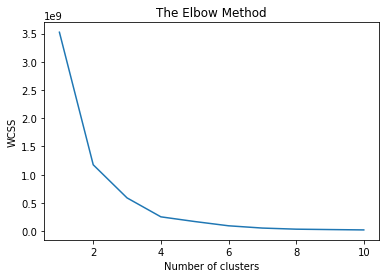

In [14]:
a = ['曝光人数','入店人数','下单人数']
kmeans(data,a)

In [15]:
b = [4,'曝光人数','入店人数','下单人数']
c = kmeans_(data,b)

e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26333 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20809 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20154 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20837 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24215 missing from current font.
  font.set_text(s, 0.0, flags=flags)
e:\python\lib\site-packages\matplotlib\b

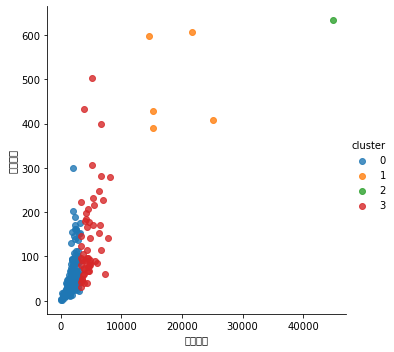

In [16]:
import seaborn as sns
%matplotlib inline
sns.lmplot(x="曝光人数", y="入店人数",data=c,fit_reg=False,hue='cluster')

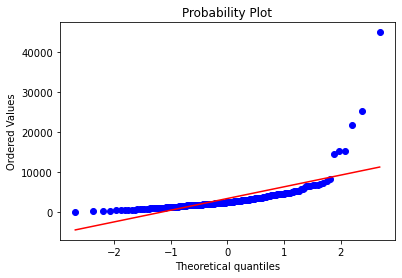

In [18]:
from pylab import *
from scipy import stats
bao = data['曝光人数']
fig = plt.figure()
res = stats.probplot(bao, plot=plt)
plt.show()

In [ ]:
data.to_csv(r'C:\Users\Administrator\Datas\爱尚花语\艾尚月季度数据\7月份数据\2data/Mdata_kmeans.csv')